## 依然使用 21 点的环境

In [1]:
%matplotlib inline
import sys
from collections import defaultdict

if "../" not in sys.path:
    sys.path.append("../")
    
import numpy as np
from lib.envs.blackjack import BlackjackEnv
from lib.utils.draw import show_value_function
import matplotlib

matplotlib.style.use('ggplot')
env = BlackjackEnv()

In [2]:
def sample_policy(observation):
    score, dealer_score, usable_ace = observation
    return 0 if score >= 20 else 1

In [3]:
def TD0_prediction(env,policy,num_episodes,gamma=0.9,alpha =0.5):
    
    V = defaultdict(float)
    V_count = defaultdict(float)
    for i_episode in range(num_episodes):
        if i_episode % 1000 == 0:
            # \r 实现动态更新
            print(f"\rEpisode :{i_episode}/{num_episodes}",end = "")
            sys.stdout.flush()
        
        state = env.reset()
        while True:
            action = policy(state)
            next_state, reward, done, _ = env.step(action)
            V_count[state] += 1.0
            V[state] = V[state] + (1 / V_count[state]) * ( reward + gamma * V[next_state] - V[state] )
            
            if done:
                break
    
    return V

Episode :99000/100000

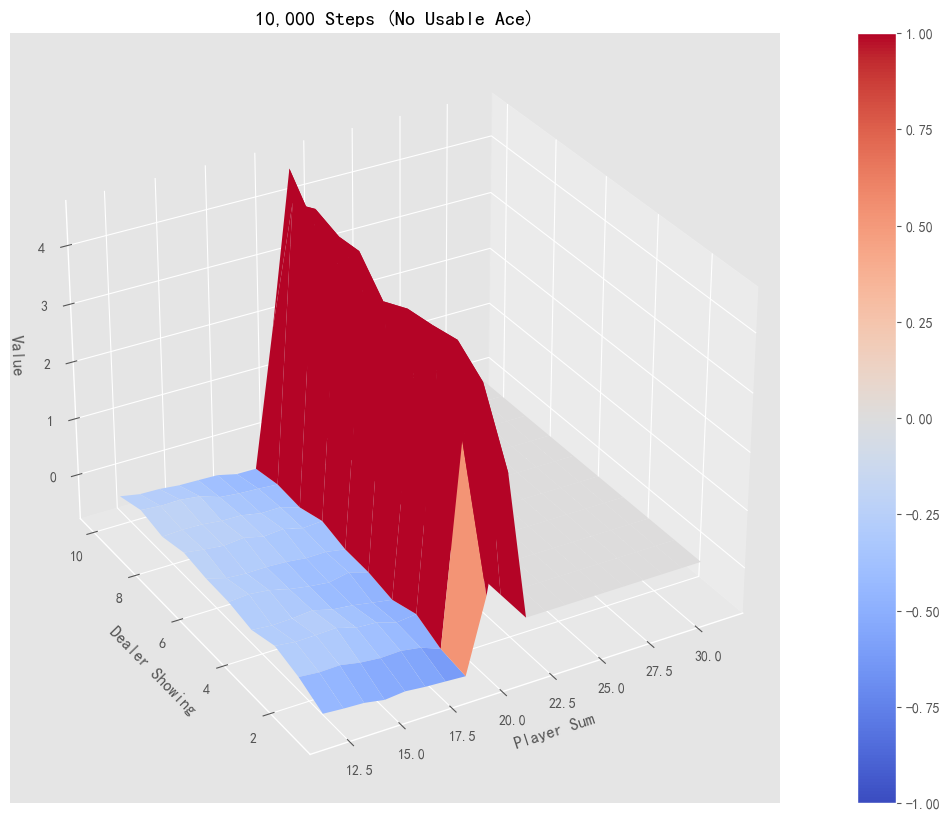

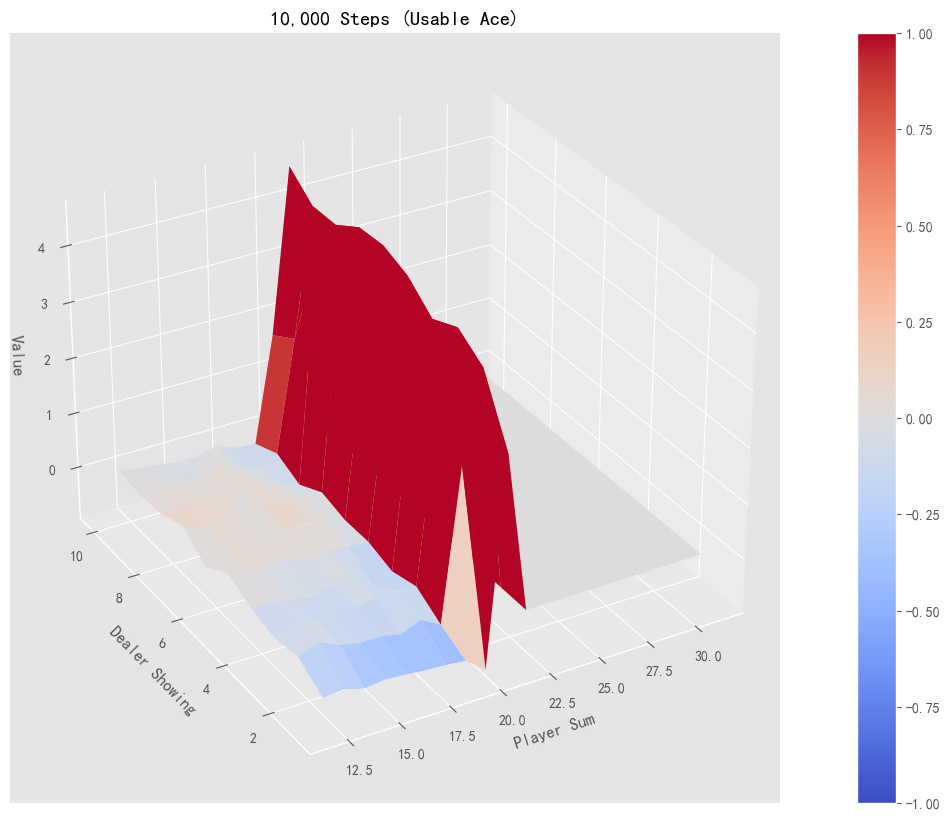

In [4]:
V_10k = TD0_prediction(env,sample_policy, num_episodes=100000)

show_value_function(V_10k, title="10,000 Steps")

## 为什么会得到这样的结果？TD 与 MC 的作用范围是怎么样的？